In [1]:
from pyrosm import OSM
from pyrosm import get_data
import openeo

In [2]:
city = "Bonn"

In [4]:
# Download data for given city, or load if already downloaded
fp = get_data(city, directory='data')
osm = OSM(fp)
print("Loaded OSM data for " + city)

# Filter buildings
buildings = osm.get_buildings()
print("Filtered buildings in " + city)

# Get boundaries of the city
min_x, min_y, max_x, max_y = buildings.total_bounds
print("Coordinates of " + city + ": " +  str(min_x), str(min_y), str(max_x), str(max_y))

Downloaded Protobuf data 'Bonn.osm.pbf' (45.65 MB) to:
'/workspaces/architecture-of-ml-systems/data/Bonn.osm.pbf'
Loaded OSM data for Bonn
Filtered buildings in Bonn
Coordinates of Bonn: 6.800000190734863 50.470001220703125 7.359999179840088 50.900001525878906


In [5]:
# OpenEO connection
connection = openeo.connect("https://earthengine.openeo.org")
connection.authenticate_basic("group1", "test123")
print("Connected to the openEO backend")

# Specify Sentinel-2 images
# TASK: image is cloudy. Band QA60 contains cloud mask. Use it to filter out cloudy pixels.
datacube = connection.load_collection(
    "COPERNICUS/S2_HARMONIZED",
    spatial_extent={"west": 13.294333, "south": 52.454927, "east": 13.500205, "north": 52.574409},
    temporal_extent=["2018-01-01", "2018-01-31"],
    bands=["B4", "B3", "B2", "QA60"]
)

qa60_band = datacube.band("QA60")
mask = qa60_band != 11

# Download Sentinel-2 images
datacube.download("datacube.png", format="PNG")
print("Downloaded Sentinel-2 images")

Connected to the openEO backend
Downloaded Sentinel-2 images


In [21]:
# connection.list_collections()
connection.describe_collection("COPERNICUS/S2_HARMONIZED")

{'description': "After 2022-01-25, Sentinel-2 scenes with PROCESSING_BASELINE '04.00' or above\nhave their DN (value) range shifted by 1000. The HARMONIZED collection\nshifts data in newer scenes to be in the same range as in older scenes.\n\nSentinel-2 is a wide-swath, high-resolution, multi-spectral\nimaging mission supporting Copernicus Land Monitoring studies,\nincluding the monitoring of vegetation, soil and water cover,\nas well as observation of inland waterways and coastal areas.\n\nThe Sentinel-2 data contain 13 UINT16 spectral bands representing\nTOA reflectance scaled by 10000. See the [Sentinel-2 User Handbook](https://sentinel.esa.int/documents/247904/685211/Sentinel-2_User_Handbook)\nfor details. In addition, three QA bands are present where one\n(QA60) is a bitmask band with cloud mask information. For more\ndetails, [see the full explanation of how cloud masks are computed.](https://sentinel.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-1c/cloud-masks)\n\nEach Sentinel-2 product (zip archive) may contain multiple\ngranules. Each granule becomes a separate Earth Engine asset.\nEE asset ids for Sentinel-2 assets have the following format:\nCOPERNICUS/S2/20151128T002653_20151128T102149_T56MNN. Here the\nfirst numeric part represents the sensing date and time, the\nsecond numeric part represents the product generation date and\ntime, and the final 6-character string is a unique granule identifier\nindicating its UTM grid reference (see [MGRS](https://en.wikipedia.org/wiki/Military_Grid_Reference_System)).\n\nThe Level-2 data produced by ESA can be found in the collection\n[COPERNICUS/S2_SR](COPERNICUS_S2_SR).\n\nFor datasets to assist with cloud and/or cloud shadow detection, see [COPERNICUS/S2_CLOUD_PROBABILITY](COPERNICUS_S2_CLOUD_PROBABILITY)\nand [GOOGLE/CLOUD_SCORE_PLUS/V1/S2_HARMONIZED](GOOGLE_CLOUD_SCORE_PLUS_V1_S2_HARMONIZED).\n\nFor more details on Sentinel-2 radiometric resolution, [see this page](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/resolutions/radiometric).\n",
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-06-27T00:00:00Z', '2024-03-11T16:34:07']]}},
 'gee:interval': {'interval': 5, 'type': 'revisit_interval', 'unit': 'day'},
 'gee:terms_of_use': 'The use of Sentinel data is governed by the [Copernicus\nSentinel Data Terms and Conditions.](https://scihub.copernicus.eu/twiki/pub/SciHubWebPortal/TermsConditions/Sentinel_Data_Terms_and_Conditions.pdf)\n',
 'gee:type': 'image_collection',
 'id': 'COPERNICUS/S2_HARMONIZED',
 'keywords': ['copernicus', 'esa', 'eu', 'msi', 'radiance', 'sentinel'],
 'license': 'proprietary',
 'links': [{'href': 'https://earthengine.openeo.org/v1.0/collections/COPERNICUS/S2_HARMONIZED',
   'rel': 'self',
   'type': 'application/json'},
  {'href': 'https://earthengine.openeo.org/v1.0/collections',
   'rel': 'parent',
   'type': 'application/json'},
  {'href': 'https://earthengine.openeo.org/v1.0/',
   'rel': 'root',
   'type': 'application/json'},
  {'code': 'JavaScript',
   'href': 'https://code.earthengine.google.com/?scriptPath=Examples:Datasets/COPERNICUS/COPERNICUS_S2_HARMONIZED',
   'rel': 'related',
   'title': 'Run the example for COPERNICUS/S2_HARMONIZED in the Earth Engine Code Editor',
   'type': 'text/html'},
  {'href': 'https://developers.google.com/earth-engine/datasets/images/COPERNICUS/COPERNICUS_S2_HARMONIZED_sample.png',
   'rel': 'preview',
   'type': 'image/png'},
  {'href': 'https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_HARMONIZED#terms-of-use',
   'rel': 'license',
   'type': 'text/html'}],
 'providers': [{'name': 'European Union/ESA/Copernicus',
   'roles': ['licensor', 'producer'],
   'url': 'https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/processing-levels/level-1'},
  {'name': 'Google Earth Engine',
   'roles': ['host'],
   'url': 'https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_HARMONIZED'}],
 'sta

<Axes: >

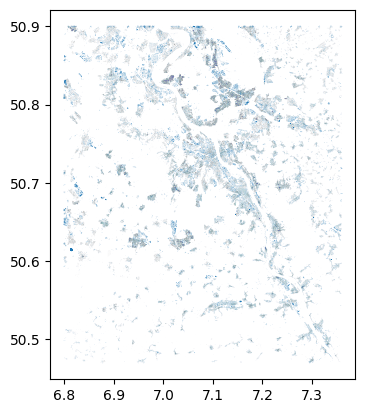

In [6]:
# Plotting the data

# TODO single band
buildings.plot()
# TODO: plot RGB
# TODO: plot ZRB
# TODO: plot overlapping building